In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [40]:
#import dataset
import numpy as np
import pandas as pd

tw_df = pd.read_json('Data/scott_moe.json', lines=True) 
tw_df.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1416805063209758722,1416805063209758720,2021-07-18 22:30:24 India Standard Time,2021-07-18,22:30:24,530,204646101,premierscottmoe,Scott Moe,,...,,,,,,[],,,,
1,1416430591067758593,1416430591067758592,2021-07-17 21:42:23 India Standard Time,2021-07-17,21:42:23,530,204646101,premierscottmoe,Scott Moe,,...,,,,,,[],,,,
2,1416192487668977666,1416192485387292672,2021-07-17 05:56:15 India Standard Time,2021-07-17,05:56:15,530,204646101,premierscottmoe,Scott Moe,,...,,,,,,[],,,,


In [41]:
#breaking into lines
all_sentences = []

for word in tw_df['tweet']:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['Saskatchewan-grown', 'artist,', 'Tesher,', 'is', 'reaching', 'audiences', 'across', 'the', 'globe', 'with', 'his', 'recent', 'collaboration', 'with', 'Jason', 'Deluro,', '‘Jalebi', 'Baby’.', 'Congratulations,', 'Tesher!', 'https://t.co/I00PFtKIIb', 'Thank', 'you', 'to', 'each', 'and', 'everyone', 'one', 'of', 'our', 'emergency', 'workers', 'battling', 'active', 'fires', 'to', 'keep', 'our', 'communities', 'safe.', 'https://t.co/8Ur61OYkQe', 'For', 'the', 'most', 'current', 'updates', 'on', 'wildfires', 'and', 'highway', 'conditions,', 'check', 'the', 'SPSA', 'website', 'https://t.co/bDUiuuaV42', 'and', 'https://t.co/PSUFaQ4IjH', '[2/2]', 'The', 'Saskatchewan', 'Public', 'Safety', 'Agency', 'is', 'advising', 'against', 'non-essential', 'travel', 'to', 'any', 'areas', 'in', 'the', 'provincial', 'forest', 'due', 'to', 'wildfires.', 'As', 'wildfire', 'conditions', 'can', 'change', 'rapidly,', 'travelling', 'in', 'impacted', 'areas', 'runs', 'the', 'risk', 'of', 'putting', 'yourself', 'in

In [42]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [43]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['saskatchewangrown',
 'artist',
 'tesher',
 'is',
 'reach',
 'audienc',
 'across',
 'the',
 'globe',
 'with',
 'his',
 'recent',
 'collabor',
 'with',
 'jason',
 'deluro',
 'jalebi',
 'babi',
 'congratul',
 'tesher',
 'httpstcoi00pftkiib',
 'thank',
 'you',
 'to',
 'each',
 'and',
 'everyon',
 'one',
 'of',
 'our',
 'emerg',
 'worker',
 'battl',
 'activ',
 'fire',
 'to',
 'keep',
 'our',
 'communiti',
 'safe',
 'httpstco8ur61oykq',
 'for',
 'the',
 'most',
 'current',
 'updat',
 'on',
 'wildfir',
 'and',
 'highway',
 'condit',
 'check',
 'the',
 'spsa',
 'websit',
 'httpstcobduiuuav42',
 'and',
 'httpstcopsufaq4ijh',
 '22',
 'the',
 'saskatchewan',
 'public',
 'safeti',
 'agenc',
 'is',
 'advis',
 'against',
 'nonessenti',
 'travel',
 'to',
 'ani',
 'area',
 'in',
 'the',
 'provinci',
 'forest',
 'due',
 'to',
 'wildfir',
 'as',
 'wildfir',
 'condit',
 'can',
 'chang',
 'rapid',
 'travel',
 'in',
 'impact',
 'area',
 'run',
 'the',
 'risk',
 'of',
 'put',
 'yourself',
 'in',
 'a',
 'd

In [44]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['saskatchewangrown',
 'artist',
 'tesher',
 'reach',
 'audienc',
 'globe',
 'recent',
 'collabor',
 'jason',
 'deluro',
 'jalebi',
 'babi',
 'congratul',
 'tesher',
 'httpstcoi00pftkiib',
 'thank',
 'everyon',
 'emerg',
 'worker',
 'battl',
 'activ',
 'fire',
 'communiti',
 'safe',
 'httpstco8ur61oykq',
 'current',
 'updat',
 'wildfir',
 'highway',
 'condit',
 'check',
 'spsa',
 'websit',
 'httpstcobduiuuav42',
 'httpstcopsufaq4ijh',
 '22',
 'saskatchewan',
 'public',
 'safeti',
 'agenc',
 'advis',
 'nonessenti',
 'travel',
 'ani',
 'area',
 'provinci',
 'forest',
 'wildfir',
 'wildfir',
 'condit',
 'chang',
 'rapid',
 'travel',
 'impact',
 'area',
 'run',
 'risk',
 'danger',
 'situat',
 '12',
 'httpstconot2rd6ekn',
 'allow',
 'good',
 'sustain',
 'produc',
 'saskatchewan',
 'product',
 'export',
 'intern',
 'market',
 'feed',
 'famili',
 'world',
 'agricultur',
 'key',
 'econom',
 'recoveri',
 'thank',
 'agt',
 'food',
 'continu',
 'invest',
 'provinc',
 '22',
 'yesterday',
 'pleas',

In [45]:
tw_df_st = pd.DataFrame(stem2)

tw_df_st = tw_df_st[0].value_counts()

In [46]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in tw_df_st:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 940, 2: 253, 3: 103, 4: 65, 5: 45, 6: 34, 7: 31, 8: 18, 9: 15, 10: 13, ...})

In [10]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


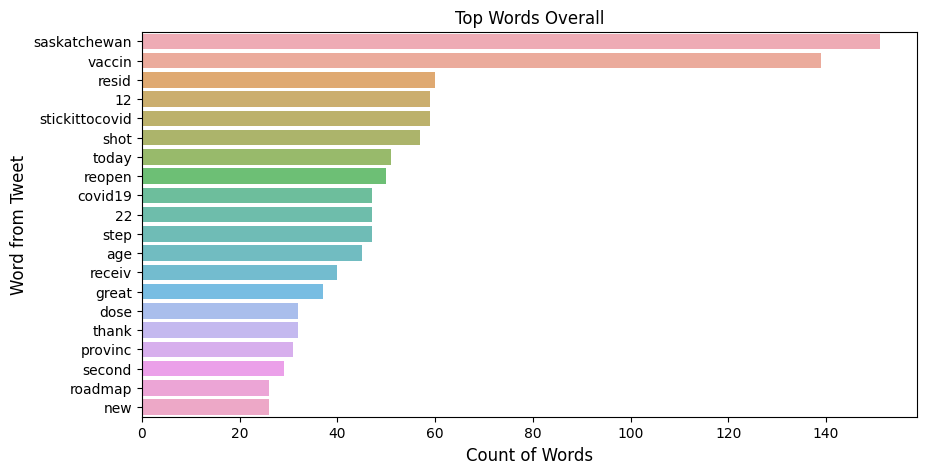

In [47]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

tw_df_st = tw_df_st[:20,]
plt.figure(figsize=(10,5))
sns.barplot(tw_df_st.values, tw_df_st.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [12]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [13]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [48]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


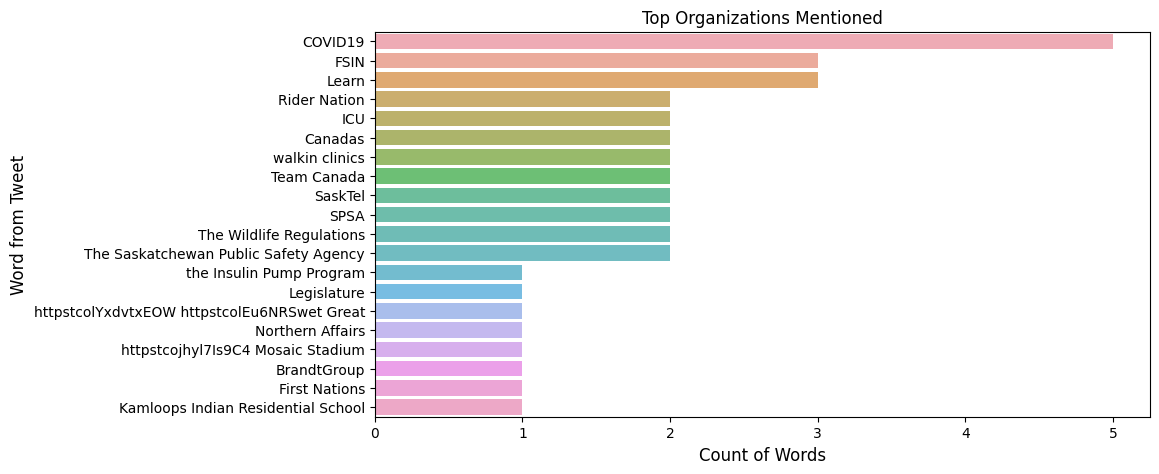

In [49]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [50]:
df.to_csv("moe.csv")